In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Load images

(175, 400)


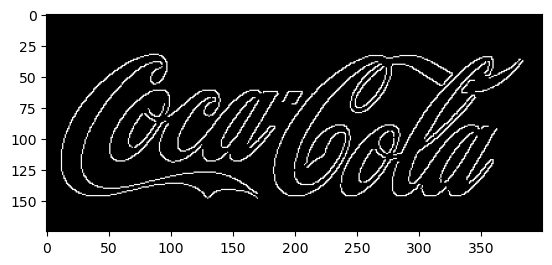

In [2]:
template = cv.imread('template/pattern.png',0)
template = cv.Canny(template, 350, 500)

print(template.shape)
plt.figure()
plt.imshow(template, cmap='gray')
plt.show()

In [3]:
images = [file for file in os.listdir('images') if '.jpg' or '.png' in file] 

In [4]:
images_rgb = {}
images_gray = {}
idx = 1
for image in images:
    img = cv.imread(f'images/{image}')
    images_rgb[f'image_{idx}'] = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    images_gray[f'image_{idx}'] = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    idx += 1

# Punto 1

In [5]:
def edge_detect(img, min, max):
    img_edge = cv.Canny(img, min, max)
    return img_edge

In [6]:
def scales_pyramid(img, template, n=3):
    print(f'Tamaño original: {img.shape}')
    img_to_scale = img.copy()
    if max(template.shape) <= max(img_to_scale.shape):
        begin = round(max(template.shape) / max(img_to_scale.shape), 1) 
    else:
        begin = round(max(img_to_scale.shape) / max(template.shape), 1)
    
    end = round(begin * n, 1)
    
    print(f"Begin {begin} End {end}")
    scales = np.linspace(begin, end, 5)
    resized_imgs = list()
    
    # se genera la piramide
    print(f'Dimensiones generadas:')
    for scale in scales:
        new_scale = cv.resize(img_to_scale, None, fx=scale, fy=scale)
        if((template.shape[0] <= new_scale.shape[0]) and (template.shape[1] <= new_scale.shape[1])):
            resized_imgs.append(new_scale)        
            print(resized_imgs[-1].shape)

    return resized_imgs

In [7]:
def confidence(image_rgb, image_resized, template, method='cv.TM_CCOEFF_NORMED'):
    w, h = template.shape[::-1]
    img_out = cv.resize(image_rgb, [image_resized.shape[1], image_resized.shape[0]], interpolation = cv.INTER_AREA)
    result = cv.matchTemplate(image_resized, template, eval(method))
    min_val, max_val, min_loc, top_left = cv.minMaxLoc(result)
    
    return max_val

In [8]:
def best_image(image_proc, image_rgb, template):
    best_conf = 0
    best_img = 0 
    for img in range(0, len(image_proc)):
        conf = confidence(image_rgb, image_proc[img], template, method='cv.TM_CCOEFF_NORMED')
        if conf > best_conf:
            best_conf = conf
            best_img = img
    return best_conf, best_img

In [9]:
def detection(image_rgb, image_resized, template, method='cv.TM_CCOEFF_NORMED'):
    
    w, h = template.shape[::-1]
    img_out = cv.resize(image_rgb, [image_resized.shape[1], image_resized.shape[0]], interpolation = cv.INTER_AREA)
    result = cv.matchTemplate(image_resized, template, eval(method))
    min_val, max_val, min_loc, top_left = cv.minMaxLoc(result)
    
    print(f"Confidence {max_val}") 

    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv.rectangle(img_out, top_left, bottom_right, 0, 15)
    
    plt.subplot(121), plt.imshow(result, cmap = 'gray')
    plt.title('Matching')
    
    plt.subplot(122),plt.imshow(img_out)
    plt.title('Detection')
    
    img_out = cv.cvtColor(img_out,cv.COLOR_BGR2RGB)
    
    plt.show()

In [10]:
images_resized = {}

Tamaño original: (1389, 1389)
Begin 0.3 End 0.9
Dimensiones generadas:
(417, 417)
(625, 625)
(833, 833)
(1042, 1042)
(1250, 1250)
0 0.07380099594593048


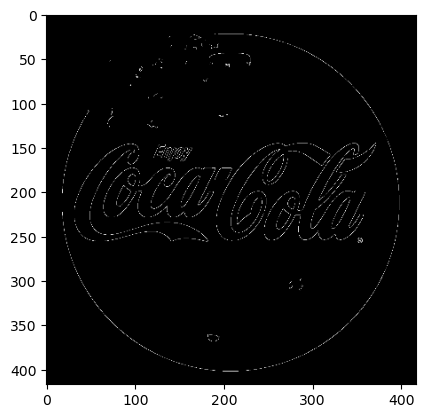

Confidence 0.07380099594593048


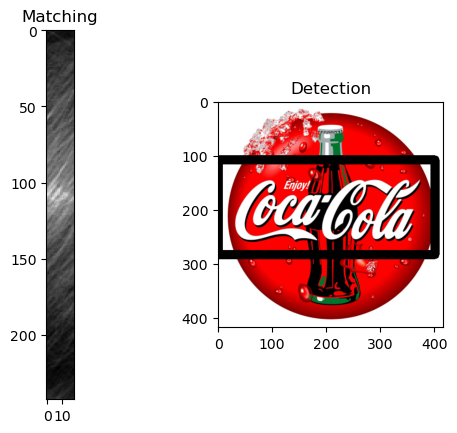

In [11]:
image_proc = scales_pyramid(edge_detect(images_gray['image_1'], 500, 1000), template)
best_conf, best_img = best_image(image_proc, images_rgb['image_1'], template)
print(best_img, best_conf)
images_resized['image_1'] = image_proc[best_img]
plt.imshow(image_proc[best_img], cmap='gray')
plt.show()
detection(images_rgb[f'image_1'], images_resized[f'image_1'], template, method='cv.TM_CCOEFF_NORMED')

Tamaño original: (598, 799)
Begin 0.5 End 5.0
Dimensiones generadas:
(299, 400)
(972, 1298)
(1644, 2197)
(2317, 3096)
(2990, 3995)
3 0.15608452260494232


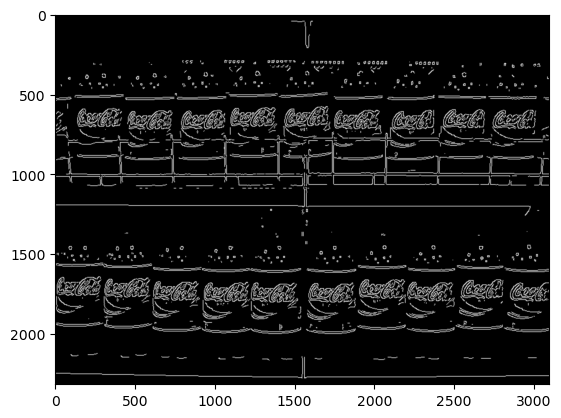

Confidence 0.15608452260494232


In [ ]:
image_proc = scales_pyramid(edge_detect(images_gray['image_2'], 400, 500), template, 10)
best_conf, best_img = best_image(image_proc, images_gray['image_2'], template)
print(best_img, best_conf)
images_resized['image_2'] = image_proc[best_img]
plt.imshow(image_proc[best_img], cmap='gray')
plt.show()
detection(images_rgb[f'image_2'], images_resized[f'image_2'], template, method='cv.TM_CCOEFF_NORMED')

In [ ]:
image_proc = scales_pyramid(edge_detect(images_gray['image_3'], 400, 500), template)
best_conf, best_img = best_image(image_proc, images_rgb['image_3'], template)
print(best_img, best_conf)
images_resized['image_3'] = image_proc[best_img]
plt.imshow(image_proc[best_img], cmap='gray')
plt.show()
detection(images_rgb[f'image_3'], images_resized[f'image_3'], template, method='cv.TM_CCOEFF_NORMED')

In [ ]:
image_proc = scales_pyramid(edge_detect(images_gray['image_4'], 550, 700), template)
best_conf, best_img = best_image(image_proc, images_rgb['image_4'], template)
print(best_img, best_conf)
images_resized['image_4'] = image_proc[best_img]
plt.imshow(image_proc[best_img], cmap='gray')
plt.show()
detection(images_rgb[f'image_4'], images_resized[f'image_4'], template, method='cv.TM_CCOEFF_NORMED')

In [ ]:
image_proc = scales_pyramid(edge_detect(images_gray['image_5'], 400, 500), template)
best_conf, best_img = best_image(image_proc, images_rgb['image_5'], template)
print(best_img, best_conf)
images_resized['image_5'] = image_proc[best_img]
plt.imshow(image_proc[best_img], cmap='gray')
plt.show()
detection(images_rgb[f'image_5'], images_resized[f'image_5'], template, method='cv.TM_CCOEFF_NORMED')

In [ ]:
image_proc = scales_pyramid(edge_detect(images_gray['image_6'], 400, 500), template)
best_conf, best_img = best_image(image_proc, images_rgb['image_6'], template)
print(best_img, best_conf)
images_resized['image_6'] = image_proc[best_img]
plt.imshow(image_proc[best_img], cmap='gray')
plt.show()
detection(images_rgb[f'image_6'], images_resized[f'image_6'], template, method='cv.TM_CCOEFF_NORMED')

In [ ]:
image_proc = scales_pyramid(edge_detect(images_gray['image_7'], 400, 500), template)
best_conf, best_img = best_image(image_proc, images_rgb['image_7'], template)
print(best_img, best_conf)
images_resized['image_7'] = image_proc[best_img]
plt.imshow(image_proc[best_img], cmap='gray')
plt.show()
detection(images_rgb[f'image_7'], images_resized[f'image_7'], template, method='cv.TM_CCOEFF_NORMED')

# Punto 2

In [ ]:
def detection_multi(image_rgb, image_resized, template, threshold, method='cv.TM_CCOEFF_NORMED'):
    
    w, h = template.shape[::-1]
    img_out = cv.resize(image_rgb, [image_resized.shape[1], image_resized.shape[0]], interpolation = cv.INTER_AREA)
    result = cv.matchTemplate(image_resized, template, eval(method))
    
    loc = np.where( result >= threshold)
    
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_out, pt, (pt[0] + w, pt[1] + h), (0), 10)
        
    plt.imshow(img_out,cmap = 'gray')

In [ ]:
detection_multi(images_rgb[f'image_2'], images_resized[f'image_2'], template, 0.11, method='cv.TM_CCOEFF_NORMED')

# Punto 3

In [ ]:
def detection_generalize(image_rgb, template, threshold=None, method='cv.TM_CCOEFF_NORMED'):
    
    image_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    image_proc = scales_pyramid(edge_detect(image_gray, 500, 800), template)
    best_conf, best_img = best_image(image_proc, image_rgb, template)
    image_resized = image_proc[best_img]
    
    
    w, h = template.shape[::-1]
    img_out = cv.resize(image_rgb, [image_resized.shape[1], image_resized.shape[0]], interpolation = cv.INTER_AREA)
    result = cv.matchTemplate(image_resized, template, eval(method))
    
    min_val, max_val, min_loc, top_left = cv.minMaxLoc(result)
         
    if threshold == None:
        loc = np.where( result >= max_val)
        print(f"Confidence {max_val}")
    else:
        loc = np.where( result >= threshold)
    
    
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_out, pt, (pt[0] + w, pt[1] + h), (0), 15)        
      
    plt.subplot(121), plt.imshow(result, cmap = 'gray')
    plt.title('Matching')
    
    plt.subplot(122),plt.imshow(img_out)
    plt.title('Detection')
    plt.show()

In [ ]:
for key, img in images_rgb.items():
    detection_generalize(img, template, method='cv.TM_CCOEFF_NORMED')